In [1]:
import scanpy as sc
import os 
import pandas as pd
import anndata
import numpy as np 
from scipy.sparse import csr_matrix 
from metadata import (
    CELL_LABEL,
    RESPONSE_LABEL, 
    CELL_TYPE_DIR, 
    CELL_GENERATION_DIR, 
    DRUG_RESPONSE_DIR, 
    DATA_DIR, 
    TOTAL_SUM,  
    MIN_GENES, 
    MIN_CELLS, 
    UNDEFINED, 
    ORIGINAL_LABEL, 
    BASE, 
    MIN_CLUSTER_SIZE, 
    COUNT_DATA_FILE_NAME, 
    SPECIES, 
    SEQUENCING_METHOD, 
    TISSUE, 
    REFERENCE, 
    DRUG, 
) 
import warnings 
warnings.filterwarnings("ignore")

The data preprocessing is based on [scanpy tutorial](https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html). 

In [2]:
METADATA_NAMES = [
    SPECIES,
    SEQUENCING_METHOD,
    TISSUE,
    REFERENCE,
    CELL_LABEL,
    RESPONSE_LABEL, 
    ORIGINAL_LABEL, 
    DRUG, 
]

def get_target_obs(obs: pd.DataFrame) -> pd.DataFrame:
    metadata_names = set(METADATA_NAMES) 
    target_obs = obs.copy()
    return target_obs.iloc[:, [i for i, column in enumerate(target_obs.columns) if column in metadata_names]]

## Xin-2016

Download related files from [GSE11429](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE114297). After extracting, place these files in ../data/cell_type_annotation/Xin-2016.

In [3]:
data_dir = os.path.join(CELL_TYPE_DIR, "Xin-2016")
preifx_list = set(
    '_'.join(filename.split('_')[: 3]) for filename in os.listdir(data_dir) if filename.startswith("GSM")
)
adata_list = [] 
for prefix in sorted(preifx_list):
    adata = sc.read_mtx(os.path.join(data_dir, f"{prefix}_matrix.mtx.gz")).T
    adata.obs_names = pd.read_csv(
        os.path.join(
            data_dir, 
            f"{prefix}_barcodes.tsv.gz"
        ), 
        sep='\t', 
        header=None
    )[0].tolist()
    adata.var_names = pd.read_csv(
        os.path.join(
            data_dir, 
            f"{prefix}_genes.tsv.gz"), 
            sep='\t', 
            header=None
        )[0].tolist()
    adata.var_names_make_unique()
    adata_list.append(adata)

In [4]:
adata = anndata.concat(adata_list)
boolean_indices = [
    False if idx.startswith("ENSG") or idx.startswith("chromosome") else True
    for idx in adata.var.index 
]
adata = adata[:, boolean_indices].copy()

In [5]:
adata.obs

""
AAACATTGATCACG-1
AAACATTGGAATCC-1
AAACCGTGATTCTC-1
AAACGCTGGCTGTA-1
AAACGGCTTCGTTT-1
...
TTTCTACTTAAGGA-1
TTTGACTGAACGTC-1
TTTGACTGAGAGGC-1
TTTGACTGCTAGTG-1


In [6]:
adata.var[SPECIES] = "human"
adata.var

,species
MI0006349,human
MI0017317,human
MI0022219,human
MI0003621,human
MI0014186,human
...,...
TSPY8,human
FAM197Y5,human
CYorf16,human
RBMY3AP,human


In [7]:
adata.obs_names_make_unique() 

In [8]:
# keep a copy of the raw data
adata.raw = adata.copy() 

# filter cells and genes 
sc.pp.filter_cells(adata, min_genes=MIN_GENES)
sc.pp.filter_genes(adata, min_cells=MIN_CELLS)

# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], percent_top=None, log1p=False, inplace=True
)

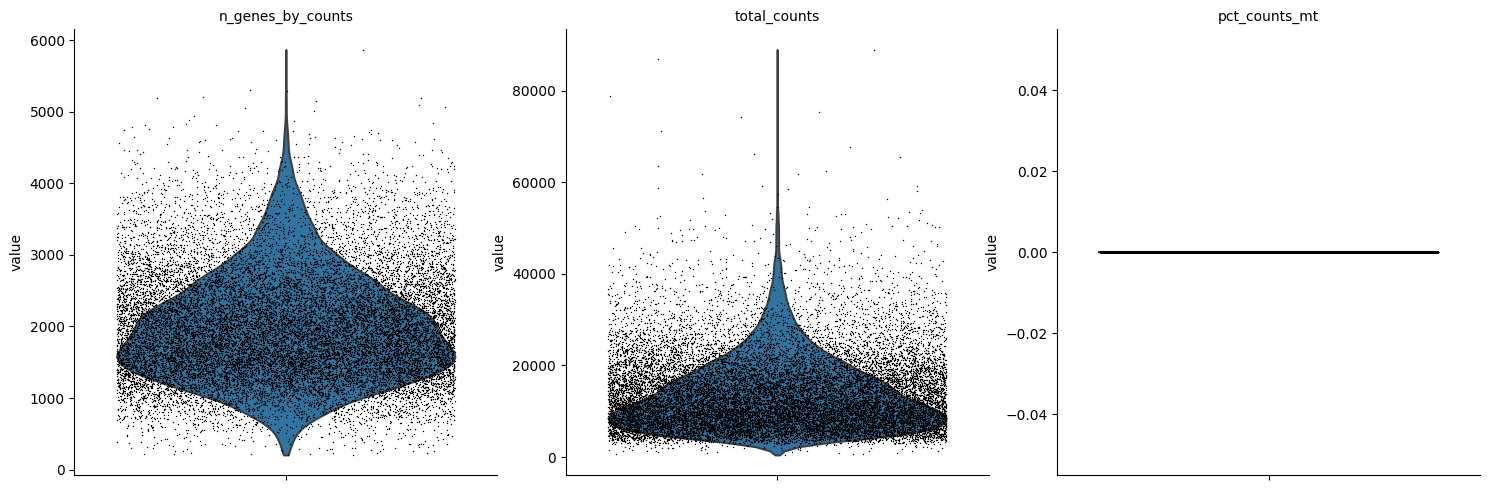

In [9]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [10]:
# filter low-quality cell 
adata = adata[adata.obs.n_genes_by_counts < 4000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :].copy()

In [11]:
adata_view = adata.copy()
sc.pp.normalize_total(adata_view, target_sum=TOTAL_SUM)
sc.pp.log1p(adata_view, base=BASE)
sc.pp.highly_variable_genes(adata_view, n_top_genes=2000)
sc.pp.pca(adata_view)
sc.pp.neighbors(adata_view)
sc.tl.umap(adata_view)
sc.tl.louvain(adata_view)

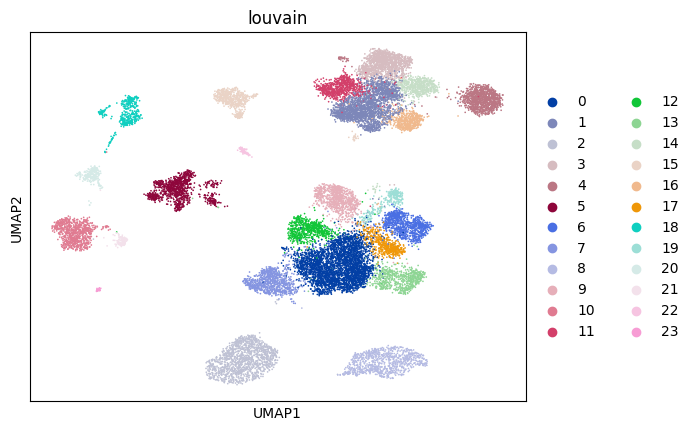

In [12]:
sc.pl.umap(adata_view, color=["louvain"])

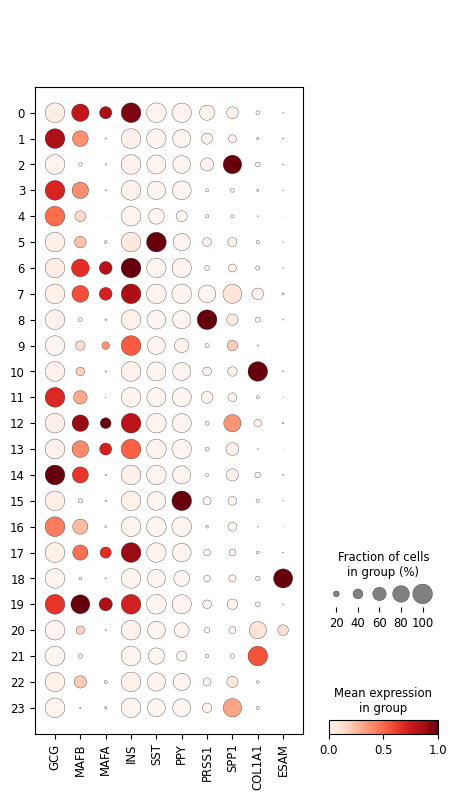

In [13]:
sc.pl.dotplot(
    adata_view, 
    groupby="louvain", 
    var_names=[
        "GCG", "MAFB", "MAFA", "INS", "SST", 
        "PPY", "PRSS1", "SPP1", "COL1A1", "ESAM"
    ], 
    standard_scale="var"
)

In [14]:
adata.obs["louvain"] = adata_view.obs["louvain"]

[Muraro et al](https://www.cell.com/cell-systems/fulltext/S2405-4712(16)30292-7) found cluster-specific expression of GCG (alpha cells), INS (beta), SST (delta), PPY (PP), PRSS1 (acinar), KRT19 (duct), and COL1A1 (mesenchyme). They looked for expression of the markers ESAM to identify endothelial cells. MAFA and MAFB are also used to distinguish beta from alpha. MAFA expression is restricted to beta cells, while MAFB expression is found in both alpha and beta cells. 

In this notebook, our annotation is based on the work of [Muraro et al](https://www.cell.com/cell-systems/fulltext/S2405-4712(16)30292-7) as well as that of [Tritschler et al](https://www.sciencedirect.com/science/article/pii/S2212877822001648). 

In [15]:
map_names = {}
for c in adata.obs["louvain"].cat.categories:
    if c in ['1', '3', '4', "11", "14", "16"]:
        map_names[c] = "Alpha"
    elif c in ['0', '6', '7', '9', "12", "13", "17"]:
        map_names[c] = "Beta"  
    elif c in ['5']:
        map_names[c] = "Delta"
    elif c in ["15"]:
        map_names[c] = "PP" 
    elif c in ['8']:
        map_names[c] = "Acinar"  
    elif c in ['2', "23"]:
        map_names[c] = "Ductal"
    elif c in ["10", "21"]:
        map_names[c] = "Mesenchyme"  
    elif c in ["18"]:
        map_names[c] = "Endothelial"
    else:
        map_names[c] = "Undefined"

In [16]:
adata.obs[CELL_LABEL] = adata.obs["louvain"].map(map_names).astype("category")
adata.obs[ORIGINAL_LABEL] = adata.obs[CELL_LABEL]
adata_view.obs[CELL_LABEL] = adata.obs[CELL_LABEL]
adata_view.obs[ORIGINAL_LABEL] = adata.obs[ORIGINAL_LABEL]

In [17]:
label_counts = adata.obs[CELL_LABEL].value_counts()
label_counts

cell_type
Beta           7959
Alpha          6678
Ductal         1385
Delta          1054
Mesenchyme      931
Acinar          892
Undefined       613
PP              599
Endothelial     417
Name: count, dtype: int64

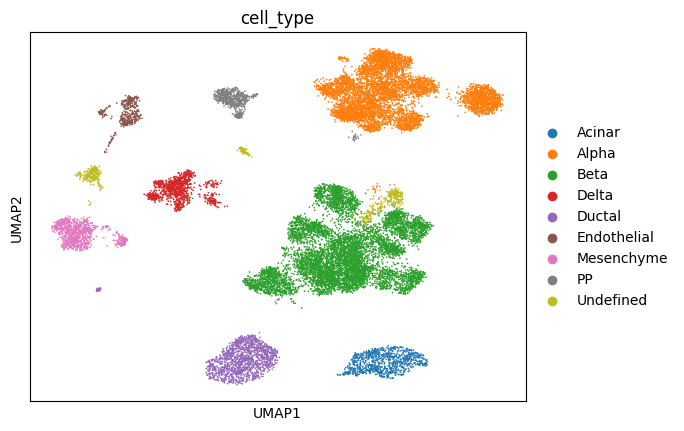

In [18]:
sc.pl.umap(adata_view, color=[CELL_LABEL])

In [19]:
adata.obs[REFERENCE] = (
    "Xin Y, Kim J, Okamoto H, et al. RNA sequencing of single human islet cells reveals type 2 diabetes genes[J]. "
    "Cell metabolism, 2016, 24(4): 608-615."
)
adata.obs[SPECIES] = "human"
adata.obs[TISSUE] = "pancreas (pancreatic islet)"
adata.obs[SEQUENCING_METHOD] = "SMARTer"
adata.obs = get_target_obs(adata.obs)
adata.obs

,cell_type,annotation,reference,species,tissue,sequencing_method
AAACATTGATCACG-1,Acinar,Acinar,"Xin Y, Kim J, Okamoto H, et al. RNA sequencing...",human,pancreas (pancreatic islet),SMARTer
AAACATTGGAATCC-1,Beta,Beta,"Xin Y, Kim J, Okamoto H, et al. RNA sequencing...",human,pancreas (pancreatic islet),SMARTer
AAACCGTGATTCTC-1,Beta,Beta,"Xin Y, Kim J, Okamoto H, et al. RNA sequencing...",human,pancreas (pancreatic islet),SMARTer
AAACGCTGGCTGTA-1,Undefined,Undefined,"Xin Y, Kim J, Okamoto H, et al. RNA sequencing...",human,pancreas (pancreatic islet),SMARTer
AAACGGCTTCGTTT-1,PP,PP,"Xin Y, Kim J, Okamoto H, et al. RNA sequencing...",human,pancreas (pancreatic islet),SMARTer
...,...,...,...,...,...,...
TTTCTACTTAAGGA-1,Alpha,Alpha,"Xin Y, Kim J, Okamoto H, et al. RNA sequencing...",human,pancreas (pancreatic islet),SMARTer
TTTGACTGAACGTC-1,Alpha,Alpha,"Xin Y, Kim J, Okamoto H, et al. RNA sequencing...",human,pancreas (pancreatic islet),SMARTer
TTTGACTGAGAGGC-1-1,Beta,Beta,"Xin Y, Kim J, Okamoto H, et al. RNA sequencing...",human,pancreas (pancreatic islet),SMARTer
TTTGACTGCTAGTG-1,Beta,Beta,"Xin Y, Kim J, Okamoto H, et al. RNA sequencing...",human,pancreas (pancreatic islet),SMARTer


In [20]:
adata.var

,species,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MI0016843,human,11,False,False,False,11,0.000529,99.947054,11.0
MI0016598,human,12,False,False,False,12,0.000674,99.942241,14.0
MI0006388,human,80,False,False,False,80,0.003995,99.614940,83.0
R3HCC1L,human,632,False,False,False,632,0.043704,96.958028,908.0
LOXL4,human,4051,False,False,False,4051,0.583221,80.501540,12117.0
...,...,...,...,...,...,...,...,...,...
TTTY2,human,8,False,False,False,8,0.000529,99.961494,11.0
AMELY,human,15,False,False,False,15,0.000770,99.927801,16.0
TBL1Y,human,32,False,False,False,32,0.002022,99.845976,42.0
PRKY,human,404,False,False,False,404,0.023633,98.055449,491.0


In [21]:
adata.write_h5ad(os.path.join(data_dir, COUNT_DATA_FILE_NAME))

## Segerstolpe-2016

Download related files from [BioStudies](https://www.ebi.ac.uk/biostudies/arrayexpress/studies/E-MTAB-5061). After extracting, place these files in ../data/cell_type_annotation/Segerstolpe-2016.

In [22]:
data_dir = os.path.join(CELL_TYPE_DIR, "Segerstolpe-2016") 
data = pd.read_csv(
    os.path.join(data_dir, "pancreas_refseq_rpkms_counts_3514sc.txt"), 
    sep='\t', 
    header=None, 
    skiprows=1
)

In [23]:
data

,0,1,2,3,4,5,6,7,8,9,...,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029
0,SGIP1,NM_032291,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,7,0,4,0,0,0,0
1,AZIN2,NM_052998+NM_001293562,0.000000,0.000000,0.000000,0.0,0.0,41.519287,0.00000,0.000000,...,0,0,0,16,0,0,0,0,0,4
2,CLIC4,NM_013943,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,2,20,64,18,0,0,0,0,0,1
3,AGBL4,NM_032785,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,5,0,0,0
4,NECAP2,NM_001145277+NM_001145278+NM_018090,0.000000,0.000000,0.000000,0.0,0.0,13.992725,0.00000,18.924347,...,0,0,0,14,0,1,47,7,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26266,ERCC_0.22888184:mix1_0.45776367:mix2,ERCC-00081,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
26267,ERCC_0.11444092:mix1_0.22888184:mix2,ERCC-00086,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
26268,ERCC_0.05722046:mix1_0.11444092:mix2,ERCC-00061,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0
26269,ERCC_0.01430512:mix1_0.02861023:mix2,ERCC-00048,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# remove ERCCs and eGFP
data = data.iloc[: 26177]
var = pd.DataFrame(index=data.iloc[:, 0].values)
# use rpkm values
# data = data.iloc[:, 2: 3516].T
# use count values 
data = data.iloc[:, 3516: ].T
X = csr_matrix(data.values)

In [25]:
X.sum(axis=-1)

matrix([[   217],
        [  1237],
        [  1512],
        ...,
        [199542],
        [  1252],
        [136577]])

In [26]:
sample_id = pd.read_csv(
    os.path.join(data_dir, "pancreas_refseq_rpkms_counts_3514sc.txt"), 
    sep='\t', 
    nrows=1, 
    header=None
).unstack().tolist()
obs = pd.DataFrame(index=sample_id[1: ])

In [27]:
adata = anndata.AnnData(X=X, obs=obs, var=var)
adata.var["features"] = adata.var.index

In [28]:
adata.obs

""
HP1502401_N13
HP1502401_D14
HP1502401_F14
HP1502401_J13
HP1502401_B13
...
HP1525301T2D_K3
HP1525301T2D_J10
HP1526901T2D_N8
HP1526901T2D_O11


In [29]:
adata.var[SPECIES] = "human"
adata.var

,features,species
SGIP1,SGIP1,human
AZIN2,AZIN2,human
CLIC4,CLIC4,human
AGBL4,AGBL4,human
NECAP2,NECAP2,human
...,...,...
KIR2DS1,KIR2DS1,human
KIR2DL2,KIR2DL2,human
KIR2DL4,KIR2DL4,human
KIR2DS3,KIR2DS3,human


In [30]:
adata.var_names_make_unique()

In [31]:
data_info = pd.read_csv(os.path.join(data_dir, "E-MTAB-5061.sdrf.txt"), sep='\t')
data_info.set_index("Source Name", inplace=True)

In [32]:
data_info = data_info.loc[adata.obs_names]

In [33]:
for name, column_name in [
    ("quality", "Characteristics [single cell quality]"), 
    ("individual", "Characteristics [individual]"), 
    (ORIGINAL_LABEL, "Characteristics [inferred cell type]"), 
    ("sex", "Characteristics [sex]"), 
    ("age", "Characteristics [age]"), 
    ("disease", "Factor Value [disease]") 
]:
    adata.obs[name] = data_info[column_name]

In [34]:
# filter low-quality cell
adata = adata[adata.obs["quality"] == 'OK'].copy()

In [35]:
adata.obs[CELL_LABEL] = adata.obs[ORIGINAL_LABEL].apply(
    lambda item: ' '.join(item.split()[: -1]).capitalize()
)

In [36]:
adata.obs[CELL_LABEL] = adata.obs[CELL_LABEL].apply(
    lambda item: {
        'Psc': 'PSC', 
        'Mhc class ii': UNDEFINED, 
        'Unclassified': UNDEFINED, 
        'Unclassified endocrine': UNDEFINED, 
        'Co-expression': UNDEFINED,
        'Epsilon': UNDEFINED, 
        'Mast': UNDEFINED,
        "Endothelial": UNDEFINED # lower than 20 cellls
    }.get(item, item)
)

In [37]:
label_counts = adata.obs[CELL_LABEL].value_counts()
label_counts

cell_type
Alpha        886
Ductal       386
Beta         270
Gamma        197
Acinar       185
Undefined    117
Delta        114
PSC           54
Name: count, dtype: int64

In [38]:
adata.raw = adata.copy() 
sc.pp.filter_cells(adata, min_genes=MIN_GENES)
sc.pp.filter_genes(adata, min_cells=MIN_CELLS)
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], percent_top=None, log1p=False, inplace=True
)

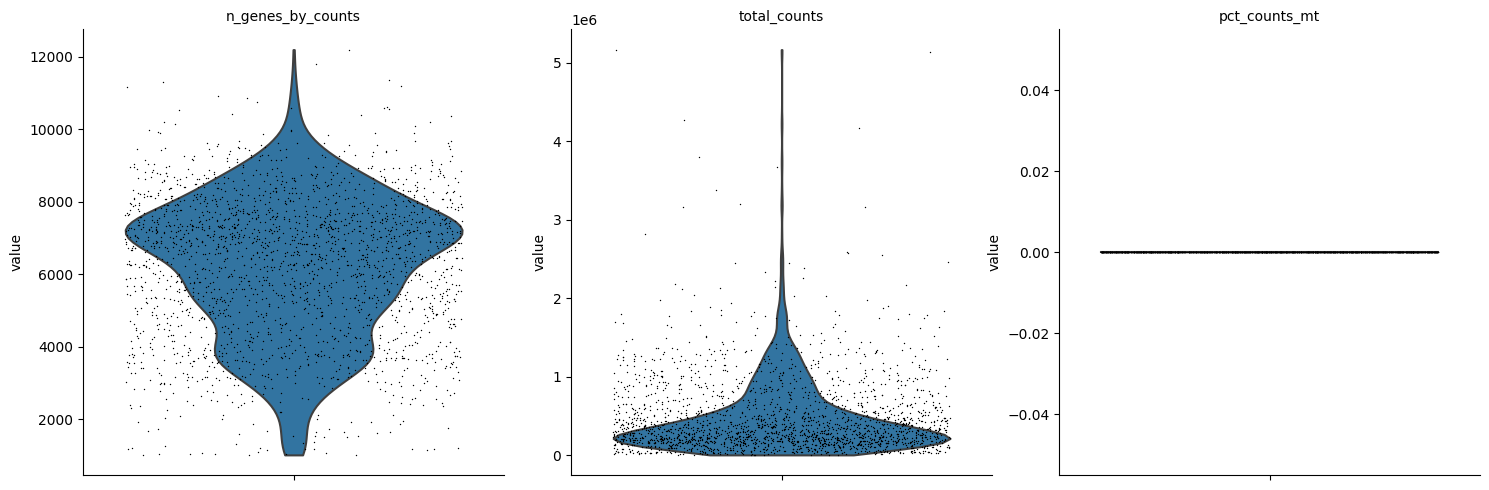

In [39]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [40]:
adata = adata[adata.obs.n_genes_by_counts < 10000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :].copy()

In [41]:
adata_view = adata.copy()   
sc.pp.normalize_total(adata_view, target_sum=TOTAL_SUM)
sc.pp.log1p(adata_view, base=BASE)
sc.pp.highly_variable_genes(adata_view, n_top_genes=2000)
sc.pp.pca(adata_view)
sc.pp.neighbors(adata_view)
sc.tl.umap(adata_view)

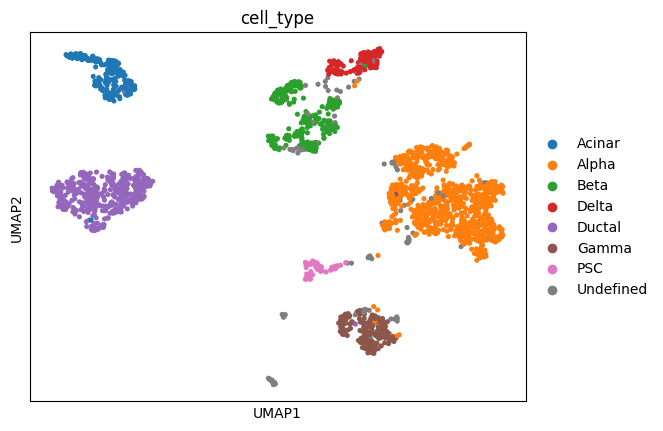

In [42]:
sc.pl.umap(adata_view, color=[CELL_LABEL])

In [43]:
adata.obs[REFERENCE] = (
    "Segerstolpe Å, Palasantza A, Eliasson P, et al. Single-cell transcriptome profiling of human pancreatic islets"
    " in health and type 2 diabetes[J]. Cell metabolism, 2016, 24(4): 593-607."
)
adata.obs[SPECIES] = "human"
adata.obs[TISSUE] = "pancreas (pancreatic islet)"
adata.obs[SEQUENCING_METHOD] = "Smart-seq2"
adata.obs = get_target_obs(adata.obs)
adata.obs

,annotation,cell_type,reference,species,tissue,sequencing_method
HP1502401_H13,gamma cell,Gamma,"Segerstolpe Å, Palasantza A, Eliasson P, et al...",human,pancreas (pancreatic islet),Smart-seq2
HP1502401_J14,alpha cell,Alpha,"Segerstolpe Å, Palasantza A, Eliasson P, et al...",human,pancreas (pancreatic islet),Smart-seq2
HP1502401_B14,beta cell,Beta,"Segerstolpe Å, Palasantza A, Eliasson P, et al...",human,pancreas (pancreatic islet),Smart-seq2
HP1502401_A14,acinar cell,Acinar,"Segerstolpe Å, Palasantza A, Eliasson P, et al...",human,pancreas (pancreatic islet),Smart-seq2
HP1502401_C14,alpha cell,Alpha,"Segerstolpe Å, Palasantza A, Eliasson P, et al...",human,pancreas (pancreatic islet),Smart-seq2
...,...,...,...,...,...,...
HP1526901T2D_F7,gamma cell,Gamma,"Segerstolpe Å, Palasantza A, Eliasson P, et al...",human,pancreas (pancreatic islet),Smart-seq2
HP1525301T2D_K3,alpha cell,Alpha,"Segerstolpe Å, Palasantza A, Eliasson P, et al...",human,pancreas (pancreatic islet),Smart-seq2
HP1525301T2D_J10,delta cell,Delta,"Segerstolpe Å, Palasantza A, Eliasson P, et al...",human,pancreas (pancreatic islet),Smart-seq2
HP1526901T2D_N8,alpha cell,Alpha,"Segerstolpe Å, Palasantza A, Eliasson P, et al...",human,pancreas (pancreatic islet),Smart-seq2


In [44]:
adata.var

,features,species,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
SGIP1,SGIP1,human,175,False,False,False,175,1.805794,92.077863,3989
AZIN2,AZIN2,human,397,False,False,False,397,4.004527,82.028067,8846
CLIC4,CLIC4,human,884,False,False,False,884,20.545043,59.981892,45384
AGBL4,AGBL4,human,234,False,False,False,234,2.161159,89.406971,4774
NECAP2,NECAP2,human,1192,False,False,False,1192,21.309190,46.038932,47072
...,...,...,...,...,...,...,...,...,...,...
MAPK8IP2,MAPK8IP2,human,1145,False,False,False,1145,20.068357,48.166591,44331
CHKB,CHKB,human,1053,False,False,False,1053,2.611589,52.331372,5769
CHKB-AS1,CHKB-AS1,human,385,False,False,False,385,2.032141,82.571299,4489
RABL2B,RABL2B,human,870,False,False,False,870,3.392033,60.615663,7493


In [45]:
adata.write_h5ad(os.path.join(data_dir, COUNT_DATA_FILE_NAME))

## He-2020

Download count matrix from [GSE159929](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE159929). After extracting, place GSM4850581_Heart_Counts.csv and GSM4850582_Liver_Counts.csv in ../data/cell_type_annotation/He-2020-Heart and ../data/cell_type_annotation/He-2020-Liver respectively. Download cell type annotation file Annotation_AHCA_alltissues_meta.data_84363_cell.txt from [Github](https://github.com/bei-lab/scRNA-AHCA/tree/master/Cell_barcode_and_corresponding_cell_types_of_AHCA) and place it in ../data/cell_type_annotation.

In [46]:
annotation = pd.read_csv(
    os.path.join(
        CELL_TYPE_DIR, 
        "Annotation_AHCA_alltissues_meta.data_84363_cell.txt"
    ), 
    sep='\t', 
    index_col=0
)

In [47]:
data_dir = os.path.join(CELL_TYPE_DIR, "He-2020-Heart")

In [48]:
def transforme_cell_type(cell_type) -> str:
    
    names = cell_type.split() 

    if all(ch.isdigit() or ('A' <= ch <= 'Z') for ch in names[-1]):
        names = names[: -1]
        
    return ' '.join(names) 

In [49]:
path = os.path.join(data_dir, "GSM4850581_Heart_Counts.csv")
data = pd.read_csv(path, skiprows=1, header=None)
data.set_index(0, inplace=True)
data = data.T
sample_id = pd.read_csv(path, nrows=1)
X = csr_matrix(data.values)
# AnnData expects .var.index.name to be a string or None
var = pd.DataFrame(index=data.columns)
var.index.name = None
obs = pd.DataFrame(index=sample_id.columns)
adata_heart = anndata.AnnData(X=X, obs=obs, var=var)
adata_heart.var_names_make_unique() 
var["features"] = var.index 

In [50]:
indices = np.vectorize(lambda x: "Heart_cDNA_" + x)(adata_heart.obs_names)
adata_heart.obs[ORIGINAL_LABEL] = annotation.loc[indices, "Cell_type_in_merged_data"].values

In [51]:
label_counts = adata_heart.obs[ORIGINAL_LABEL].value_counts()
label_counts

annotation
Fibroblast PTN                4007
Endothelial Cell FABP4         912
Smooth Muscle Cell             900
Endothelial Cell ACKR1         889
Macrophage C1QB                526
Macrophage FCN3                129
Fibroblast GSN                 109
Fibroblast PTGDS                76
T Cell PRF1                     62
Monocyte                        59
Macrophage RNASE1               55
T Cell XCL1                     37
T Cell IL7R                     32
Melanocyte                      31
Fibroblast PLA2G2A              21
T Cell GZMK                     12
Fibroblast C7                    8
NK/T Cell GNLY                   7
Fibroblast APOD                  4
Lymphatic Endothelial Cell       3
Plasma Cell JCHAIN               2
Name: count, dtype: int64

In [52]:
adata_heart.obs[CELL_LABEL] = adata_heart.obs[ORIGINAL_LABEL].apply(
    lambda cell_type: cell_type if label_counts[cell_type] >= MIN_CLUSTER_SIZE else UNDEFINED
)

In [53]:
label_counts = adata_heart.obs[CELL_LABEL].value_counts()
label_counts

cell_type
Fibroblast PTN            4007
Endothelial Cell FABP4     912
Smooth Muscle Cell         900
Endothelial Cell ACKR1     889
Macrophage C1QB            526
Macrophage FCN3            129
Fibroblast GSN             109
Fibroblast PTGDS            76
T Cell PRF1                 62
Monocyte                    59
Macrophage RNASE1           55
T Cell XCL1                 37
Undefined                   36
T Cell IL7R                 32
Melanocyte                  31
Fibroblast PLA2G2A          21
Name: count, dtype: int64

In [54]:
adata_heart.obs

,annotation,cell_type
AAACCTGAGAGACGAA-1,Macrophage C1QB,Macrophage C1QB
AAACCTGAGAGAGCTC-1,Macrophage FCN3,Macrophage FCN3
AAACCTGAGCTCCTTC-1,Fibroblast PTN,Fibroblast PTN
AAACCTGAGGGCTTGA-1,Fibroblast PTGDS,Fibroblast PTGDS
AAACCTGAGTGATCGG-1,Fibroblast PTN,Fibroblast PTN
...,...,...
TTTGTCATCGACGGAA-1,Endothelial Cell ACKR1,Endothelial Cell ACKR1
TTTGTCATCGGTCTAA-1,Endothelial Cell ACKR1,Endothelial Cell ACKR1
TTTGTCATCGTAGATC-1,Smooth Muscle Cell,Smooth Muscle Cell
TTTGTCATCGTGGACC-1,Fibroblast GSN,Fibroblast GSN


In [55]:
adata_heart.var[SPECIES] = "human"
adata_heart.var

,species
FO538757.2,human
RP4-669L17.10,human
RP11-206L10.9,human
FAM87B,human
LINC00115,human
...,...
AC145212.2,human
AC011043.1,human
AL592183.1,human
AL354822.1,human


In [56]:
adata_heart.raw = adata_heart.copy() 
sc.pp.filter_cells(adata_heart, min_genes=MIN_GENES)
sc.pp.filter_genes(adata_heart, min_cells=MIN_CELLS)
adata_heart.var["mt"] = adata_heart.var_names.str.startswith("MT-")
adata_heart.var["ribo"] = adata_heart.var_names.str.startswith(("RPS", "RPL"))
adata_heart.var["hb"] = adata_heart.var_names.str.contains("^HB[^(P)]")
sc.pp.calculate_qc_metrics(
    adata_heart, qc_vars=["mt", "ribo", "hb"], percent_top=None, log1p=False, inplace=True
)

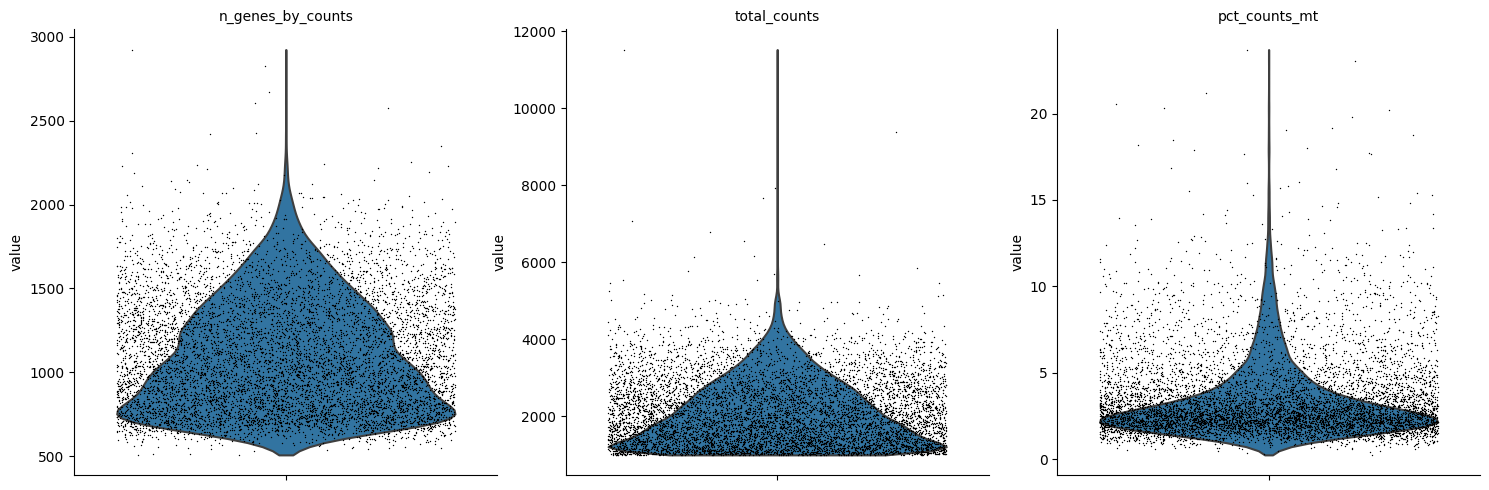

In [57]:
sc.pl.violin(
    adata_heart,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [58]:
# filter low-quality cell 
adata_heart = adata_heart[adata_heart.obs.n_genes_by_counts < 2000, :]
adata_heart = adata_heart[adata_heart.obs.pct_counts_mt < 7, :].copy()

In [59]:
adata_heart.obs[CELL_LABEL] = adata_heart.obs[CELL_LABEL].apply(transforme_cell_type)
label_counts = adata_heart.obs[CELL_LABEL].value_counts()
label_counts

cell_type
Fibroblast            4120
Endothelial Cell      1713
Macrophage             612
Smooth Muscle Cell     496
T Cell                 126
Monocyte                53
Undefined               33
Melanocyte              31
Name: count, dtype: int64

In [60]:
adata_heart_view = adata_heart.copy() 
sc.pp.normalize_total(adata_heart_view, target_sum=TOTAL_SUM)
sc.pp.log1p(adata_heart_view, base=BASE)
sc.pp.highly_variable_genes(adata_heart_view, n_top_genes=2000)
sc.pp.pca(adata_heart_view)
sc.pp.neighbors(adata_heart_view)
sc.tl.umap(adata_heart_view)

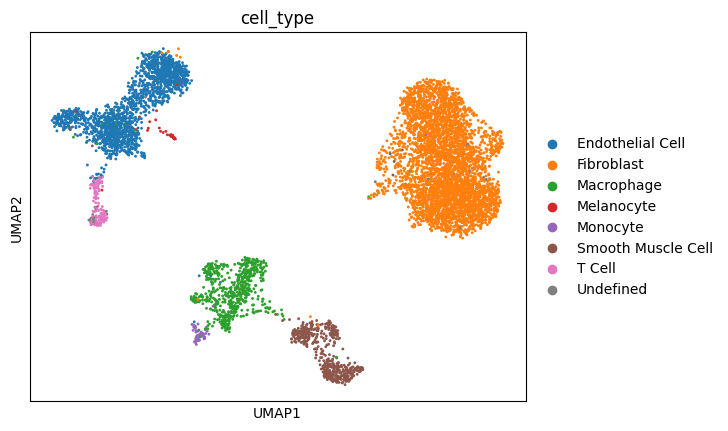

In [61]:
sc.pl.umap(adata_heart_view, color=[CELL_LABEL])

In [62]:
adata_heart.obs[REFERENCE] = (
    "He S, Wang L H, Liu Y, et al. Single-cell transcriptome profiling of an adult"
    " human cell atlas of 15 major organs[J]. Genome biology, 2020, 21: 1-34."
)
adata_heart.obs[SPECIES] = "human"
adata_heart.obs[TISSUE] = "heart"
adata_heart.obs[SEQUENCING_METHOD] = "HiSeq X Ten System"
adata_heart.obs = get_target_obs(adata_heart.obs)
adata_heart.obs

,annotation,cell_type,reference,species,tissue,sequencing_method
AAACCTGAGAGACGAA-1,Macrophage C1QB,Macrophage,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,heart,HiSeq X Ten System
AAACCTGAGAGAGCTC-1,Macrophage FCN3,Macrophage,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,heart,HiSeq X Ten System
AAACCTGAGCTCCTTC-1,Fibroblast PTN,Fibroblast,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,heart,HiSeq X Ten System
AAACCTGAGGGCTTGA-1,Fibroblast PTGDS,Fibroblast,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,heart,HiSeq X Ten System
AAACCTGAGTGATCGG-1,Fibroblast PTN,Fibroblast,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,heart,HiSeq X Ten System
...,...,...,...,...,...,...
TTTGTCATCACATACG-1,Macrophage FCN3,Macrophage,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,heart,HiSeq X Ten System
TTTGTCATCGACGGAA-1,Endothelial Cell ACKR1,Endothelial Cell,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,heart,HiSeq X Ten System
TTTGTCATCGGTCTAA-1,Endothelial Cell ACKR1,Endothelial Cell,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,heart,HiSeq X Ten System
TTTGTCATCGTGGACC-1,Fibroblast GSN,Fibroblast,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,heart,HiSeq X Ten System


In [63]:
adata_heart.var

,species,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
FO538757.2,human,846,False,False,False,846,0.115721,89.265322,912
RP4-669L17.10,human,8,False,False,False,8,0.001015,99.898490,8
RP11-206L10.9,human,35,False,False,False,35,0.004441,99.555894,35
FAM87B,human,9,False,False,False,9,0.001142,99.885801,9
LINC00115,human,44,False,False,False,44,0.005583,99.441695,44
...,...,...,...,...,...,...,...,...,...
AC145212.2,human,246,False,False,False,246,0.033498,96.878569,264
AC011043.1,human,128,False,False,False,128,0.016495,98.375841,130
AL592183.1,human,38,False,False,False,38,0.004822,99.517828,38
AL354822.1,human,19,False,False,False,19,0.002411,99.758914,19


In [64]:
adata_heart.write_h5ad(os.path.join(data_dir, COUNT_DATA_FILE_NAME))

In [65]:
data_dir = os.path.join(CELL_TYPE_DIR, "He-2020-Liver")

In [66]:
path = os.path.join(data_dir, "GSM4850582_Liver_Counts.csv")
data = pd.read_csv(path, skiprows=1, header=None)
data.set_index(0, inplace=True)
data = data.T
sample_id = pd.read_csv(path, nrows=1)
X = csr_matrix(data.values)
var = pd.DataFrame(index=data.columns)
var.index.name = None
obs = pd.DataFrame(index=sample_id.columns)
adata_liver = anndata.AnnData(X=X, obs=obs, var=var)
adata_liver.var_names_make_unique() 
var["features"] = var.index 

In [67]:
indices = np.vectorize(lambda x: "Liver_cDNA_" + x)(adata_liver.obs_names)
adata_liver.obs[ORIGINAL_LABEL] = annotation.loc[indices, "Cell_type_in_merged_data"].values

In [68]:
label_counts = adata_liver.obs[ORIGINAL_LABEL].value_counts()
label_counts

annotation
Monocyte                      712
T Cell GZMK                   707
Macrophage C1QB               385
Macrophage FCN3               257
NK/T Cell GNLY                223
T Cell XCL1                   159
T Cell IL7R                   154
Endothelial Cell ACKR1         72
Cholangiocyte                  55
B Cell CD79A                   53
Smooth Muscle Cell             32
Lymphatic Endothelial Cell     15
Plasma Cell JCHAIN              7
Endothelial Cell FABP4          2
Melanocyte                      2
Fibroblast C7                   2
Epithelial Cell TFF3            1
T Cell CCL5                     1
Name: count, dtype: int64

In [69]:
adata_liver.obs[CELL_LABEL] = adata_liver.obs[ORIGINAL_LABEL].apply(
    lambda cell_type: cell_type if label_counts[cell_type] >= MIN_CLUSTER_SIZE else UNDEFINED
)

In [70]:
label_counts = adata_liver.obs[CELL_LABEL].value_counts()
label_counts

cell_type
Monocyte                  712
T Cell GZMK               707
Macrophage C1QB           385
Macrophage FCN3           257
NK/T Cell GNLY            223
T Cell XCL1               159
T Cell IL7R               154
Endothelial Cell ACKR1     72
Cholangiocyte              55
B Cell CD79A               53
Smooth Muscle Cell         32
Undefined                  30
Name: count, dtype: int64

In [71]:
adata_liver.obs

,annotation,cell_type
AAACCTGCAATCTACG-1,T Cell GZMK,T Cell GZMK
AAACCTGGTATTCTCT-1,NK/T Cell GNLY,NK/T Cell GNLY
AAACCTGGTTGCTCCT-1,Macrophage C1QB,Macrophage C1QB
AAACCTGTCACTTACT-1,Monocyte,Monocyte
AAACGGGAGGCCGAAT-1,T Cell GZMK,T Cell GZMK
...,...,...
TTTGTCAGTAGAGCTG-1,Macrophage FCN3,Macrophage FCN3
TTTGTCAGTAGGCATG-1,Endothelial Cell ACKR1,Endothelial Cell ACKR1
TTTGTCAGTGTGAAAT-1,Macrophage FCN3,Macrophage FCN3
TTTGTCATCAACACGT-1,Macrophage FCN3,Macrophage FCN3


In [72]:
adata_liver.var[SPECIES] = "human"
adata_liver.var

,species
RP11-34P13.7,human
FO538757.2,human
AP006222.2,human
RP4-669L17.10,human
RP11-206L10.9,human
...,...
AC011043.1,human
AL592183.1,human
AC007325.4,human
AC004556.1,human


In [73]:
adata_liver.raw = adata_liver.copy() 
sc.pp.filter_cells(adata_liver, min_genes=MIN_GENES)
sc.pp.filter_genes(adata_liver, min_cells=MIN_CELLS)
adata_liver.var["mt"] = adata_liver.var_names.str.startswith("MT-")
adata_liver.var["ribo"] = adata_liver.var_names.str.startswith(("RPS", "RPL"))
adata_liver.var["hb"] = adata_liver.var_names.str.contains("^HB[^(P)]")
sc.pp.calculate_qc_metrics(
    adata_liver, qc_vars=["mt", "ribo", "hb"], percent_top=None, log1p=False, inplace=True
)

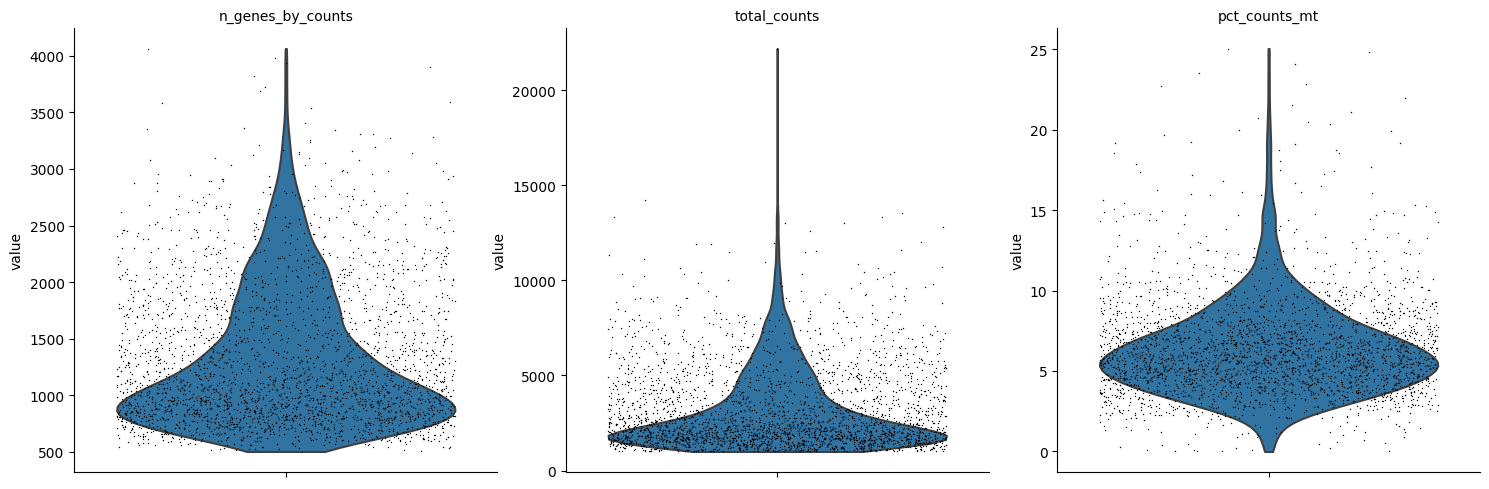

In [74]:
sc.pl.violin(
    adata_liver,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [75]:
# filter low-quality cell 
adata_liver = adata_liver[adata_liver.obs.n_genes_by_counts < 3000, :]
adata_liver = adata_liver[adata_liver.obs.pct_counts_mt < 10, :].copy()

In [76]:
adata_liver.obs[CELL_LABEL] = adata_liver.obs[CELL_LABEL].apply(transforme_cell_type)

In [77]:
adata_liver.obs.cell_type.value_counts() 

cell_type
T Cell                982
Monocyte              614
Macrophage            562
NK/T Cell             222
Endothelial Cell       59
B Cell                 53
Undefined              28
Smooth Muscle Cell     23
Cholangiocyte          18
Name: count, dtype: int64

In [78]:
adata_liver_view = adata_liver.copy()
sc.pp.normalize_total(adata_liver_view, target_sum=TOTAL_SUM)
sc.pp.log1p(adata_liver_view, base=BASE)
sc.pp.highly_variable_genes(adata_liver_view, n_top_genes=2000)
sc.pp.pca(adata_liver_view)
sc.pp.neighbors(adata_liver_view)
sc.tl.umap(adata_liver_view)

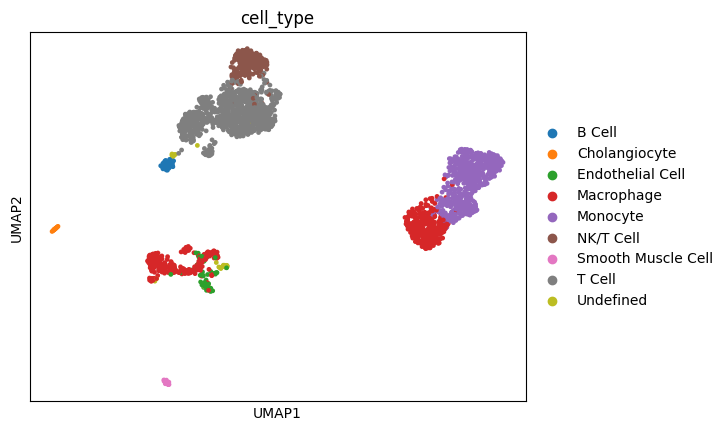

In [79]:
sc.pl.umap(adata_liver_view, color=[CELL_LABEL])

In [80]:
adata_liver.obs[REFERENCE] = (
    "He S, Wang L H, Liu Y, et al. Single-cell transcriptome profiling of an adult"
    " human cell atlas of 15 major organs[J]. Genome biology, 2020, 21: 1-34."
)
adata_liver.obs[SPECIES] = "human"
adata_liver.obs[TISSUE] = "liver"
adata_liver.obs[SEQUENCING_METHOD] = "HiSeq X Ten System"
adata_liver.obs = get_target_obs(adata_liver.obs)

In [81]:
adata_liver.obs

,annotation,cell_type,reference,species,tissue,sequencing_method
AAACCTGCAATCTACG-1,T Cell GZMK,T Cell,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,liver,HiSeq X Ten System
AAACCTGGTATTCTCT-1,NK/T Cell GNLY,NK/T Cell,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,liver,HiSeq X Ten System
AAACCTGGTTGCTCCT-1,Macrophage C1QB,Macrophage,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,liver,HiSeq X Ten System
AAACCTGTCACTTACT-1,Monocyte,Monocyte,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,liver,HiSeq X Ten System
AAACGGGAGGCCGAAT-1,T Cell GZMK,T Cell,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,liver,HiSeq X Ten System
...,...,...,...,...,...,...
TTTGTCAGTAGAGCTG-1,Macrophage FCN3,Macrophage,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,liver,HiSeq X Ten System
TTTGTCAGTAGGCATG-1,Endothelial Cell ACKR1,Endothelial Cell,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,liver,HiSeq X Ten System
TTTGTCAGTGTGAAAT-1,Macrophage FCN3,Macrophage,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,liver,HiSeq X Ten System
TTTGTCATCAACACGT-1,Macrophage FCN3,Macrophage,"He S, Wang L H, Liu Y, et al. Single-cell tran...",human,liver,HiSeq X Ten System


In [82]:
adata_liver.var

,species,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
FO538757.2,human,445,False,False,False,445,0.172948,84.325467,491
AP006222.2,human,13,False,False,False,13,0.004579,99.542092,13
RP4-669L17.10,human,12,False,False,False,12,0.004227,99.577316,12
RP11-206L10.9,human,20,False,False,False,20,0.007045,99.295527,20
LINC00115,human,20,False,False,False,20,0.007045,99.295527,20
...,...,...,...,...,...,...,...,...,...
MT-CYB,human,2790,True,False,False,2790,11.912293,1.725960,33819
AC145212.2,human,51,False,False,False,51,0.019725,98.203593,56
AC011043.1,human,31,False,False,False,31,0.011976,98.908066,34
AL592183.1,human,17,False,False,False,17,0.005988,99.401198,17


In [83]:
adata_liver.write_h5ad(os.path.join(data_dir, COUNT_DATA_FILE_NAME))

## PBMC68K

Download related files from [figshare](https://figshare.com/s/49b29cb24b27ec8b6d72). After extracting, place these files in ../data/conditional_pseudo_cell_generation/PBMC68K.

In [84]:
data_dir = os.path.join(CELL_GENERATION_DIR, "PBMC68K")

In [85]:
adata = sc.read_mtx(
    os.path.join(data_dir, "filtered_matrices_mex/hg19/matrix.mtx")
).T
annotation = pd.read_csv(
    os.path.join(data_dir, "filtered_matrices_mex/68k_pbmc_barcodes_annotation.tsv"),
    sep='\t',
)
obs = pd.read_csv(
    os.path.join(data_dir, "filtered_matrices_mex/hg19/barcodes.tsv"), 
    header=None
)
var = pd.read_csv(
    os.path.join(data_dir, "filtered_matrices_mex/hg19/genes.tsv"), 
    sep='\t', 
    header=None, 
)
obs.columns = ["barcodes"]
var.columns = ["ensembl_ids", "symbols"]
obs.set_index("barcodes", inplace=True)
var.set_index("ensembl_ids", inplace=True)
adata.obs = obs
adata.var = var
adata.obs.loc[annotation["barcodes"].values, CELL_LABEL] = annotation["celltype"].values

In [86]:
adata.obs

,cell_type
barcodes,
AAACATACACCCAA-1,CD8+ Cytotoxic T
AAACATACCCCTCA-1,CD8+/CD45RA+ Naive Cytotoxic
AAACATACCGGAGA-1,CD4+/CD45RO+ Memory
AAACATACTAACCG-1,CD19+ B
AAACATACTCTTCA-1,CD4+/CD25 T Reg
...,...
TTTGCATGAGCCTA-8,CD8+ Cytotoxic T
TTTGCATGCTAGCA-8,CD8+/CD45RA+ Naive Cytotoxic
TTTGCATGCTGCAA-8,CD8+ Cytotoxic T


In [87]:
adata.var[SPECIES] = "human"
adata.var 

,symbols,species
ensembl_ids,,
ENSG00000243485,MIR1302-10,human
ENSG00000237613,FAM138A,human
ENSG00000186092,OR4F5,human
ENSG00000238009,RP11-34P13.7,human
ENSG00000239945,RP11-34P13.8,human
...,...,...
ENSG00000215635,AC145205.1,human
ENSG00000268590,BAGE5,human
ENSG00000251180,CU459201.1,human


In [88]:
label_counts = adata.obs[CELL_LABEL].value_counts()
label_counts

cell_type
CD8+ Cytotoxic T                20773
CD8+/CD45RA+ Naive Cytotoxic    16666
CD56+ NK                         8776
CD4+/CD25 T Reg                  6187
CD19+ B                          5908
CD4+/CD45RO+ Memory              3061
CD14+ Monocyte                   2862
Dendritic                        2099
CD4+/CD45RA+/CD25- Naive T       1873
CD34+                             277
CD4+ T Helper2                     97
Name: count, dtype: int64

In [89]:
adata.obs[ORIGINAL_LABEL] = adata.obs[CELL_LABEL]

In [90]:
adata.raw = adata.copy() 
sc.pp.filter_cells(adata, min_genes=MIN_GENES)
sc.pp.filter_genes(adata, min_cells=MIN_CELLS)
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")
sc.pp.calculate_qc_metrics(
    adata, 
    qc_vars=["mt", "ribo", "hb"], 
    percent_top=None, 
    log1p=False, 
    inplace=True, 
)

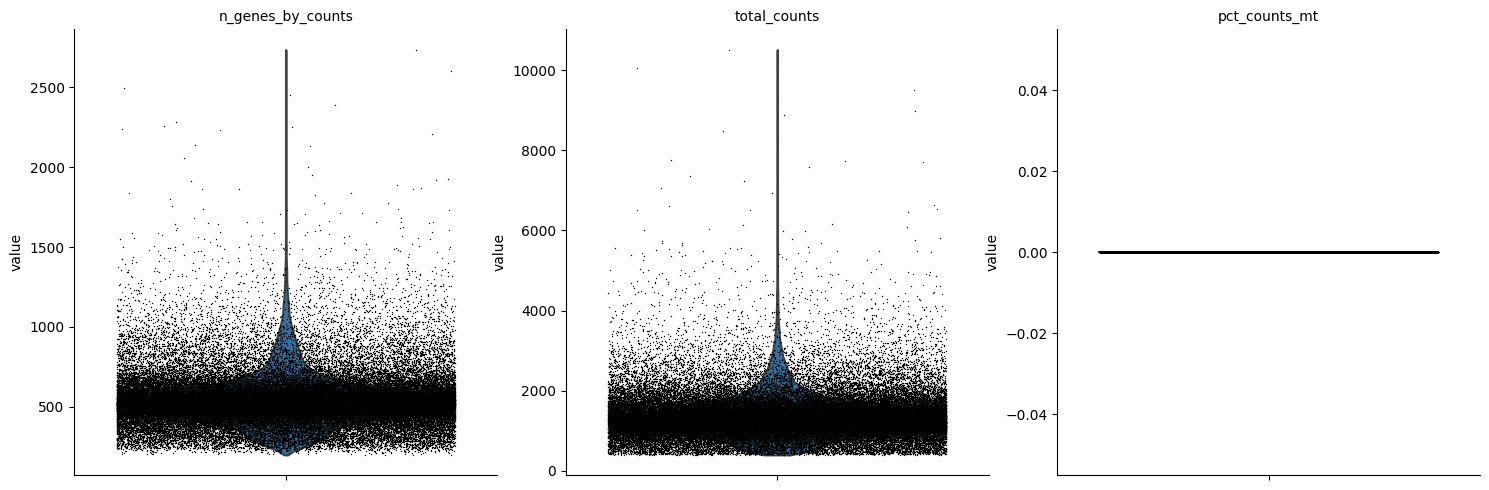

In [91]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [92]:
adata = adata[adata.obs.n_genes_by_counts < 1250, :]
adata = adata[adata.obs.pct_counts_mt < 7, :].copy()

In [93]:
adata_view = adata.copy()   
sc.pp.normalize_total(adata_view, target_sum=TOTAL_SUM)
sc.pp.log1p(adata_view, base=BASE)
sc.pp.highly_variable_genes(adata_view, n_top_genes=2000)
sc.pp.pca(adata_view)
sc.pp.neighbors(adata_view)
sc.tl.umap(adata_view)

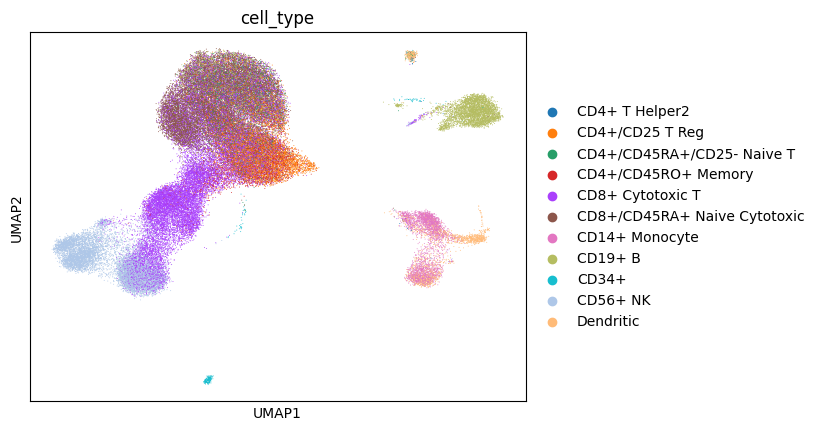

In [94]:
sc.pl.umap(adata_view, color=[CELL_LABEL])

In [95]:
adata.obs[REFERENCE] = (
    "Zheng G X Y, Terry J M, Belgrader P, et al. Massively parallel digital transcriptional " 
    "profiling of single cells[J]. Nature communications, 2017, 8(1): 14049."
)
adata.obs[SPECIES] = "human"
adata.obs[TISSUE] = "peripheral blood"
adata.obs[SEQUENCING_METHOD] = "10xGenomics (GemCode Technology Platform)"
adata.obs = get_target_obs(adata.obs)
adata.obs

,cell_type,annotation,reference,species,tissue,sequencing_method
barcodes,,,,,,
AAACATACACCCAA-1,CD8+ Cytotoxic T,CD8+ Cytotoxic T,"Zheng G X Y, Terry J M, Belgrader P, et al. Ma...",human,peripheral blood,10xGenomics (GemCode Technology Platform)
AAACATACCCCTCA-1,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,"Zheng G X Y, Terry J M, Belgrader P, et al. Ma...",human,peripheral blood,10xGenomics (GemCode Technology Platform)
AAACATACCGGAGA-1,CD4+/CD45RO+ Memory,CD4+/CD45RO+ Memory,"Zheng G X Y, Terry J M, Belgrader P, et al. Ma...",human,peripheral blood,10xGenomics (GemCode Technology Platform)
AAACATACTAACCG-1,CD19+ B,CD19+ B,"Zheng G X Y, Terry J M, Belgrader P, et al. Ma...",human,peripheral blood,10xGenomics (GemCode Technology Platform)
AAACATACTCTTCA-1,CD4+/CD25 T Reg,CD4+/CD25 T Reg,"Zheng G X Y, Terry J M, Belgrader P, et al. Ma...",human,peripheral blood,10xGenomics (GemCode Technology Platform)
...,...,...,...,...,...,...
TTTGCATGAGCCTA-8,CD8+ Cytotoxic T,CD8+ Cytotoxic T,"Zheng G X Y, Terry J M, Belgrader P, et al. Ma...",human,peripheral blood,10xGenomics (GemCode Technology Platform)
TTTGCATGCTAGCA-8,CD8+/CD45RA+ Naive Cytotoxic,CD8+/CD45RA+ Naive Cytotoxic,"Zheng G X Y, Terry J M, Belgrader P, et al. Ma...",human,peripheral blood,10xGenomics (GemCode Technology Platform)
TTTGCATGCTGCAA-8,CD8+ Cytotoxic T,CD8+ Cytotoxic T,"Zheng G X Y, Terry J M, Belgrader P, et al. Ma...",human,peripheral blood,10xGenomics (GemCode Technology Platform)


In [96]:
adata.var[adata.var_names.name] = adata.var_names 
adata.var.set_index("symbols", inplace=True)
adata.var_names = adata.var_names.astype("str")
adata.var

,species,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,ensembl_ids
symbols,,,,,,,,,,
AL627309.1,human,64,False,False,False,64,0.000948,99.906639,65.0,ENSG00000237683
RP11-206L10.2,human,91,False,False,False,91,0.001327,99.867252,91.0,ENSG00000228327
RP11-206L10.9,human,55,False,False,False,55,0.000817,99.919768,56.0,ENSG00000237491
LINC00115,human,429,False,False,False,429,0.006375,99.374189,437.0,ENSG00000225880
FAM41C,human,33,False,False,False,33,0.000481,99.951861,33.0,ENSG00000230368
...,...,...,...,...,...,...,...,...,...,...
AC011841.1,human,23,False,False,False,23,0.000379,99.966448,26.0,ENSG00000212884
AL354822.1,human,20,False,False,False,20,0.000292,99.970825,20.0,ENSG00000215615
KIR2DL2,human,20,False,False,False,20,0.000292,99.970825,20.0,ENSG00000215764


In [97]:
adata.write_h5ad(os.path.join(data_dir, COUNT_DATA_FILE_NAME))

## Tabular-Sapiens 

Download related files from [figshare](https://figshare.com/s/49b29cb24b27ec8b6d72). After extracting, place these files in ../data/Tabular-Sapiens.

In [98]:
data_dir = os.path.join(DATA_DIR, "Tabular-Sapiens")
adata = anndata.read_h5ad(os.path.join(data_dir, "sapiens/sapiens_ood_data.h5ad"))
adata.X = adata.layers["raw_counts"] 
adata.obs[CELL_LABEL] = adata.obs[ORIGINAL_LABEL] = adata.obs["cell_ontology_class"]

In [99]:
adata.obs

,organ_tissue,method,donor,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,gender,cellinfo,cell_type,annotation
AAACGAACACAAGCTT_TSP7_Blood_NA_10X_1_1,Blood,10X,TSP7,nan,4108.0,1603,naive b cell,naive b cell,True,immune,female,naive b cell_Blood,naive b cell,naive b cell
AAACGAAGTGCAACGA_TSP7_Blood_NA_10X_1_1,Blood,10X,TSP7,nan,5282.0,2165,nk cell,nk cell,True,immune,female,nk cell_Blood,nk cell,nk cell
AAACGAATCTCGCAGG_TSP7_Blood_NA_10X_1_1,Blood,10X,TSP7,nan,5002.0,2114,nk cell,nk cell,True,immune,female,nk cell_Blood,nk cell,nk cell
AAACGCTCAAGGGCAT_TSP7_Blood_NA_10X_1_1,Blood,10X,TSP7,nan,7670.0,2384,memory b cell,memory b cell,True,immune,female,memory b cell_Blood,memory b cell,memory b cell
AAAGAACGTCTCACGG_TSP7_Blood_NA_10X_1_1,Blood,10X,TSP7,nan,4435.0,2053,nk cell,nk cell,True,immune,female,nk cell_Blood,nk cell,nk cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P4_S364,Vasculature,smartseq2,TSP2,aorta,175437.0,2632,macrophage,macrophage,True,immune,female,macrophage_Vasculature,macrophage,macrophage
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P5_S365,Vasculature,smartseq2,TSP2,aorta,37347.0,395,macrophage,macrophage,True,immune,female,macrophage_Vasculature,macrophage,macrophage
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P6_S366,Vasculature,smartseq2,TSP2,aorta,111047.0,769,macrophage,macrophage,True,immune,female,macrophage_Vasculature,macrophage,macrophage
TSP2_Vasculature_aorta_SS2_B113343_B133091_Immune_P7_S367,Vasculature,smartseq2,TSP2,aorta,140634.0,2468,macrophage,macrophage,True,immune,female,macrophage_Vasculature,macrophage,macrophage


In [100]:
adata.var[SPECIES] = "human"
adata.var

,species
A1BG,human
A1BG-AS1,human
A1CF,human
A2M,human
A2M-AS1,human
...,...
ZYG11A,human
ZYG11B,human
ZYX,human
ZZEF1,human


In [101]:
adata.raw = adata.copy() 
sc.pp.filter_cells(adata, min_genes=MIN_GENES)
sc.pp.filter_genes(adata, min_cells=MIN_CELLS)
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], percent_top=None, log1p=False, inplace=True
)

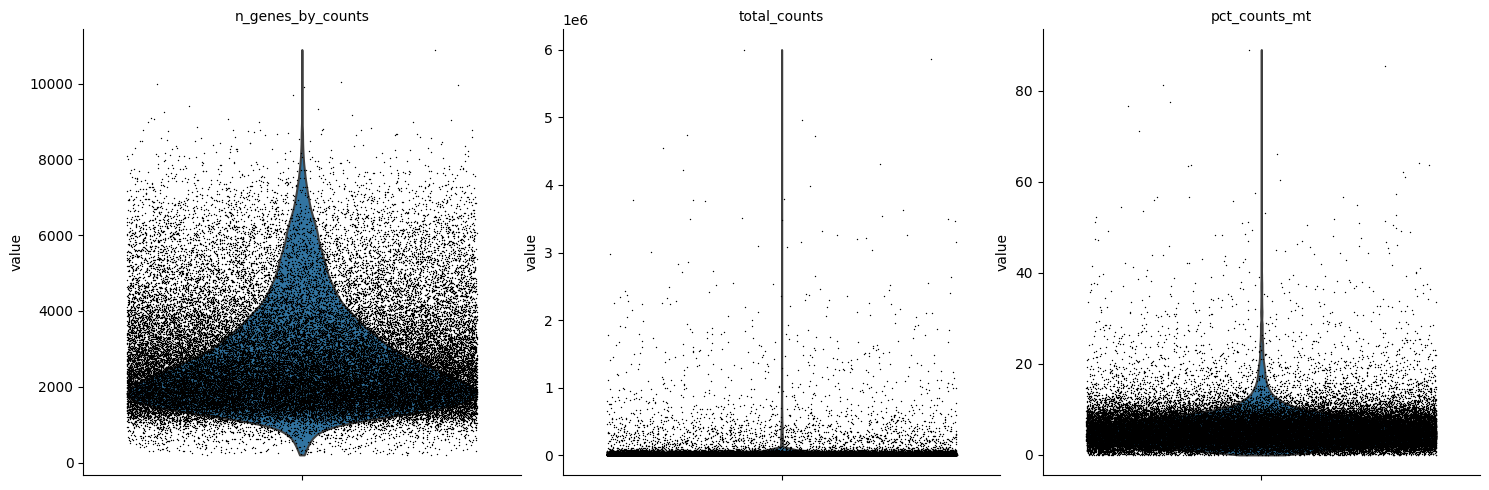

In [102]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [103]:
adata = adata[adata.obs.n_genes_by_counts < 7250, :]
adata = adata[adata.obs.pct_counts_mt < 15, :] 
adata = adata[adata.obs.method == "10X"].copy() 

In [104]:
adata_view = adata.copy()   
sc.pp.normalize_total(adata_view, target_sum=TOTAL_SUM)
sc.pp.log1p(adata_view, base=BASE)
sc.pp.highly_variable_genes(adata_view, n_top_genes=2000)
sc.pp.pca(adata_view)
sc.pp.neighbors(adata_view)
sc.tl.umap(adata_view)

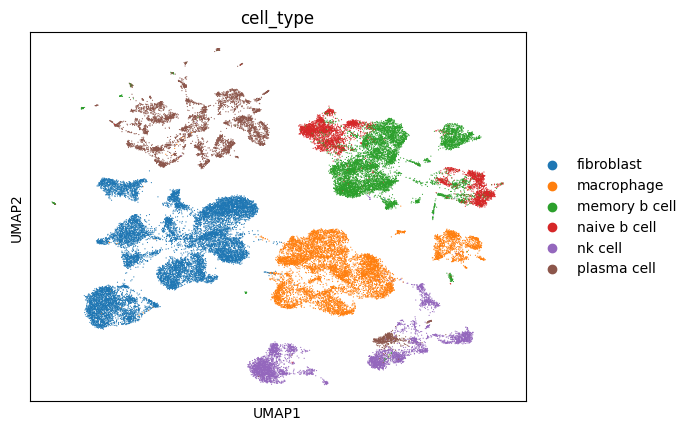

In [105]:
sc.pl.umap(adata_view, color=[CELL_LABEL])

In [106]:
adata.obs[REFERENCE] = (
    "The Tabula Sapiens Consortium*, Jones R C, Karkanias J, et al. The Tabula Sapiens: "
    "A multiple-organ, single-cell transcriptomic atlas of humans[J]. Science, 2022, 376(6594): eabl4896." 
)
adata.obs[SPECIES] = "human"
adata.obs[TISSUE] = adata.obs["organ_tissue"].apply(lambda tissue: tissue.lower())
adata.obs[SEQUENCING_METHOD] = "10xGenomics (Chromium Next GEM Single Cell 3′ Kit v3.1)"
adata.obs = get_target_obs(adata.obs)
adata.obs

,cell_type,annotation,reference,species,tissue,sequencing_method
AAACGAACACAAGCTT_TSP7_Blood_NA_10X_1_1,naive b cell,naive b cell,"The Tabula Sapiens Consortium*, Jones R C, Kar...",human,blood,10xGenomics (Chromium Next GEM Single Cell 3′ ...
AAACGAAGTGCAACGA_TSP7_Blood_NA_10X_1_1,nk cell,nk cell,"The Tabula Sapiens Consortium*, Jones R C, Kar...",human,blood,10xGenomics (Chromium Next GEM Single Cell 3′ ...
AAACGAATCTCGCAGG_TSP7_Blood_NA_10X_1_1,nk cell,nk cell,"The Tabula Sapiens Consortium*, Jones R C, Kar...",human,blood,10xGenomics (Chromium Next GEM Single Cell 3′ ...
AAACGCTCAAGGGCAT_TSP7_Blood_NA_10X_1_1,memory b cell,memory b cell,"The Tabula Sapiens Consortium*, Jones R C, Kar...",human,blood,10xGenomics (Chromium Next GEM Single Cell 3′ ...
AAAGAACGTCTCACGG_TSP7_Blood_NA_10X_1_1,nk cell,nk cell,"The Tabula Sapiens Consortium*, Jones R C, Kar...",human,blood,10xGenomics (Chromium Next GEM Single Cell 3′ ...
...,...,...,...,...,...,...
TTTACTGAGCCGGATA_TSP2_Vasculature_Aorta_10X_2_1,fibroblast,fibroblast,"The Tabula Sapiens Consortium*, Jones R C, Kar...",human,vasculature,10xGenomics (Chromium Next GEM Single Cell 3′ ...
TTTCCTCGTCATACCA_TSP2_Vasculature_Aorta_10X_2_1,fibroblast,fibroblast,"The Tabula Sapiens Consortium*, Jones R C, Kar...",human,vasculature,10xGenomics (Chromium Next GEM Single Cell 3′ ...
TTTGACTGTTCGGACC_TSP2_Vasculature_Aorta_10X_2_1,fibroblast,fibroblast,"The Tabula Sapiens Consortium*, Jones R C, Kar...",human,vasculature,10xGenomics (Chromium Next GEM Single Cell 3′ ...
TTTGGTTAGTTGTCGT_TSP2_Vasculature_Aorta_10X_2_1,macrophage,macrophage,"The Tabula Sapiens Consortium*, Jones R C, Kar...",human,vasculature,10xGenomics (Chromium Next GEM Single Cell 3′ ...


In [107]:
adata.var 

,species,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
A1BG,human,648,False,False,False,648,0.033158,98.686664,1636.0
A1BG-AS1,human,1536,False,False,False,1536,0.091001,96.886907,4490.0
A1CF,human,17,False,False,False,17,0.008979,99.965545,443.0
A2M,human,10862,False,False,False,10862,9.083218,77.985407,448166.0
A2M-AS1,human,1550,False,False,False,1550,0.099655,96.858533,4917.0
...,...,...,...,...,...,...,...,...,...
ZXDC,human,6713,False,False,False,6713,0.410195,86.394406,20239.0
ZYG11A,human,264,False,False,False,264,0.013113,99.464937,647.0
ZYG11B,human,11229,False,False,False,11229,0.582529,77.241589,28742.0
ZYX,human,19033,False,False,False,19033,1.801885,61.424807,88905.0


In [108]:
selected_tissues = np.unique(adata.obs[TISSUE].values)
for tissue in selected_tissues:
    current_adata = adata[adata.obs[TISSUE] == tissue].copy() 
    data_dir = os.path.join(CELL_GENERATION_DIR, f"Tabular-Sapiens-{tissue.title()}")
    if not os.path.exists(data_dir):
        os.mkdir(os.path.join(CELL_GENERATION_DIR, f"Tabular-Sapiens-{tissue.title()}"))
    current_adata.write_h5ad(os.path.join(data_dir, COUNT_DATA_FILE_NAME))

## GSE117872

Download related files from [GSE117872](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE117872). Place these files in ../data/drug_sensitivity_prediction/GSE117872.

In [109]:
data_dir = os.path.join(DRUG_RESPONSE_DIR, "GSE117872")

In [110]:
data = pd.read_csv(os.path.join(data_dir, "GSE117872_good_Data_TPM.txt"), sep='\t').T
obs = pd.DataFrame(index=data.index) 
var = pd.DataFrame(index=data.columns)
adata = anndata.AnnData(X=csr_matrix(data.values) , obs=obs, var=var)
adata.var["features"] = adata.var_names

In [111]:
adata.obs 

""
RHC6558
RHC6559
RHC6560
RHC6561
RHC6562
...
RHH3298
RHH3299
RHH3300
RHH3301


In [112]:
adata.var[SPECIES] = "human"
adata.var 

,features,species
SGIP1,SGIP1,human
CLIC4,CLIC4,human
AGBL4,AGBL4,human
NECAP2,NECAP2,human
SLC45A1,SLC45A1,human
...,...,...
MIR3667,MIR3667,human
DENND6B,DENND6B,human
SYCE3,SYCE3,human
CHKB-AS1,CHKB-AS1,human


In [113]:
labels = pd.read_csv(
    os.path.join(data_dir, "GSE117872_good_Data_cellinfo.txt"),
    sep='\t', 
    index_col=0
)

In [114]:
labels

,cell_color,patient_id,origin,drug_status,cluster,pca_clusters,pagoda_clusters,Unnamed: 8
groups,,,,,,,,
RHC6558,HN148M,bisque,HN148,Metastatic,Sensitive,3,1,1
RHC6559,HN148M,bisque,HN148,Metastatic,Sensitive,3,1,1
RHC6560,HN148M,bisque,HN148,Metastatic,Sensitive,3,1,1
RHC6561,HN148M,bisque,HN148,Metastatic,Sensitive,3,1,1
RHC6562,HN148M,bisque,HN148,Metastatic,Sensitive,3,1,1
...,...,...,...,...,...,...,...,...
RHH3298,HN137PCRDH,brown,HN137,Primary,Holiday,2,2,3
RHH3299,HN137PCRDH,brown,HN137,Primary,Holiday,2,2,3
RHH3300,HN137PCRDH,brown,HN137,Primary,Holiday,2,2,3


In [115]:
adata.obs.index.name = labels.index.name
adata.obs = adata.obs.join(labels)
adata.obs.drop(["Unnamed: 8"], inplace=True, axis=1)
adata.obs[RESPONSE_LABEL] = adata.obs["cluster"]

In [116]:
# The data has been normalized so we renormalize it 
adata.raw = adata.copy() 
adata.X = adata.X / (adata.X.sum(axis=-1)[0]) * TOTAL_SUM 
adata_view = adata.copy()
sc.pp.log1p(adata_view, base=BASE) 
sc.pp.highly_variable_genes(adata_view, n_top_genes=2000)
sc.pp.pca(adata_view)
sc.pp.neighbors(adata_view)
sc.tl.umap(adata_view)

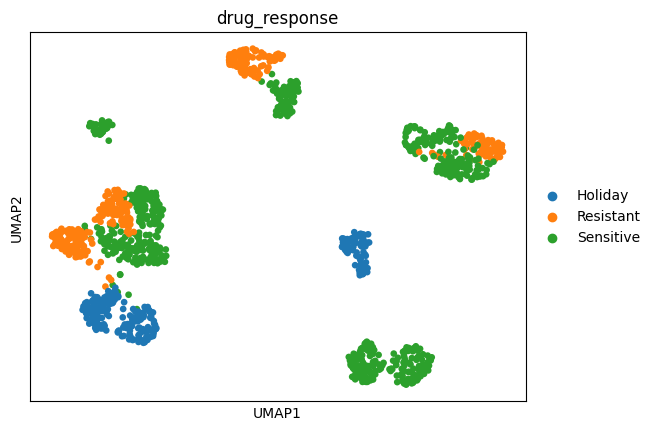

In [117]:
sc.pl.umap(adata_view, color=[RESPONSE_LABEL])

In [118]:
adata.obs[REFERENCE] = (
    "Sharma A, Cao E Y, Kumar V, et al. Longitudinal single-cell RNA sequencing of patient-derived primary cells "
    "reveals drug-induced infidelity in stem cell hierarchy[J]. Nature communications, 2018, 9(1): 4931."
)
adata.obs[SPECIES] = "human"
adata.obs[TISSUE] = "oral cavity"
adata.obs[SEQUENCING_METHOD] = "Fluidigm C1"
adata.obs[DRUG] = "Cisplatin"
adata.obs = get_target_obs(adata.obs)
adata.obs

,drug_response,reference,species,tissue,sequencing_method,drug
groups,,,,,,
RHC6558,Sensitive,"Sharma A, Cao E Y, Kumar V, et al. Longitudina...",human,oral cavity,Fluidigm C1,Cisplatin
RHC6559,Sensitive,"Sharma A, Cao E Y, Kumar V, et al. Longitudina...",human,oral cavity,Fluidigm C1,Cisplatin
RHC6560,Sensitive,"Sharma A, Cao E Y, Kumar V, et al. Longitudina...",human,oral cavity,Fluidigm C1,Cisplatin
RHC6561,Sensitive,"Sharma A, Cao E Y, Kumar V, et al. Longitudina...",human,oral cavity,Fluidigm C1,Cisplatin
RHC6562,Sensitive,"Sharma A, Cao E Y, Kumar V, et al. Longitudina...",human,oral cavity,Fluidigm C1,Cisplatin
...,...,...,...,...,...,...
RHH3298,Holiday,"Sharma A, Cao E Y, Kumar V, et al. Longitudina...",human,oral cavity,Fluidigm C1,Cisplatin
RHH3299,Holiday,"Sharma A, Cao E Y, Kumar V, et al. Longitudina...",human,oral cavity,Fluidigm C1,Cisplatin
RHH3300,Holiday,"Sharma A, Cao E Y, Kumar V, et al. Longitudina...",human,oral cavity,Fluidigm C1,Cisplatin


In [119]:
adata.var[SPECIES] = "human"
adata.var 

,features,species
SGIP1,SGIP1,human
CLIC4,CLIC4,human
AGBL4,AGBL4,human
NECAP2,NECAP2,human
SLC45A1,SLC45A1,human
...,...,...
MIR3667,MIR3667,human
DENND6B,DENND6B,human
SYCE3,SYCE3,human
CHKB-AS1,CHKB-AS1,human


In [120]:
adata.write_h5ad(os.path.join(data_dir, COUNT_DATA_FILE_NAME))

## GSE149383

Download related files from [Github](https://github.com/OSU-BMBL/scDEAL). Place these files in ../data/drug_sensitivity_prediction/GSE149383.

In [121]:
data_dir = os.path.join(DRUG_RESPONSE_DIR, "GSE149383")

In [122]:
data = pd.read_csv(
    os.path.join(data_dir, "erl_total_data_2K.csv"), 
    index_col=0
).T
obs = pd.DataFrame(index=data.index)
var = pd.DataFrame(index=data.columns)
adata = anndata.AnnData(X=csr_matrix(data.values), obs=obs, var=var)
adata.var["features"] = adata.var_names

In [123]:
adata.obs 

""
sens_GTTTGCTGTTTC
sens_AGCAAATCACCG
sens_CATGCCTGGTGT
sens_CTTTAACCGCCT
sens_CACCCCCAAGCA
...
resis_GGTTCATAACTT
resis_GTCCCGACTGCA
resis_GCCACGGACGAG
resis_GGCTCACCGAAT


In [124]:
adata.var[SPECIES] = "human"
adata.var 

,features,species
A2ML1,A2ML1,human
A4GALT,A4GALT,human
AAAS,AAAS,human
AACS,AACS,human
AADAC,AADAC,human
...,...,...
ZNF730,ZNF730,human
ZNF77,ZNF77,human
ZNF774,ZNF774,human
ZRANB2-AS1,ZRANB2-AS1,human


In [125]:
labels = pd.read_csv(
    os.path.join(data_dir, "erl_total_2K_meta.csv"),
    header=None, 
    index_col=0
)

In [126]:
labels

,1,2,3
0,,,
sens_GTTTGCTGTTTC,erl,20925,sensitive
sens_AGCAAATCACCG,erl,20447,sensitive
sens_CATGCCTGGTGT,erl,20685,sensitive
sens_CTTTAACCGCCT,erl,21302,sensitive
sens_CACCCCCAAGCA,erl,22318,sensitive
...,...,...,...
resis_GGTTCATAACTT,erlres,272,resistant
resis_GTCCCGACTGCA,erlres,260,resistant
resis_GCCACGGACGAG,erlres,236,resistant


In [127]:
adata.obs = adata.obs.join(labels, how="left")
adata.obs[RESPONSE_LABEL] = adata.obs.iloc[:, 2].values
adata.obs[RESPONSE_LABEL] = adata.obs[RESPONSE_LABEL].replace(
    {
        "sensitive": "Sensitive", 
        "resistant": "Resistant"
    }
)

In [128]:
adata.obs.drop([1, 2, 3], axis=1, inplace=True) 

In [129]:
adata.raw = adata.copy()
sc.pp.filter_cells(adata, min_genes=MIN_GENES)
sc.pp.filter_genes(adata, min_cells=MIN_CELLS)
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], percent_top=None, log1p=False, inplace=True
)

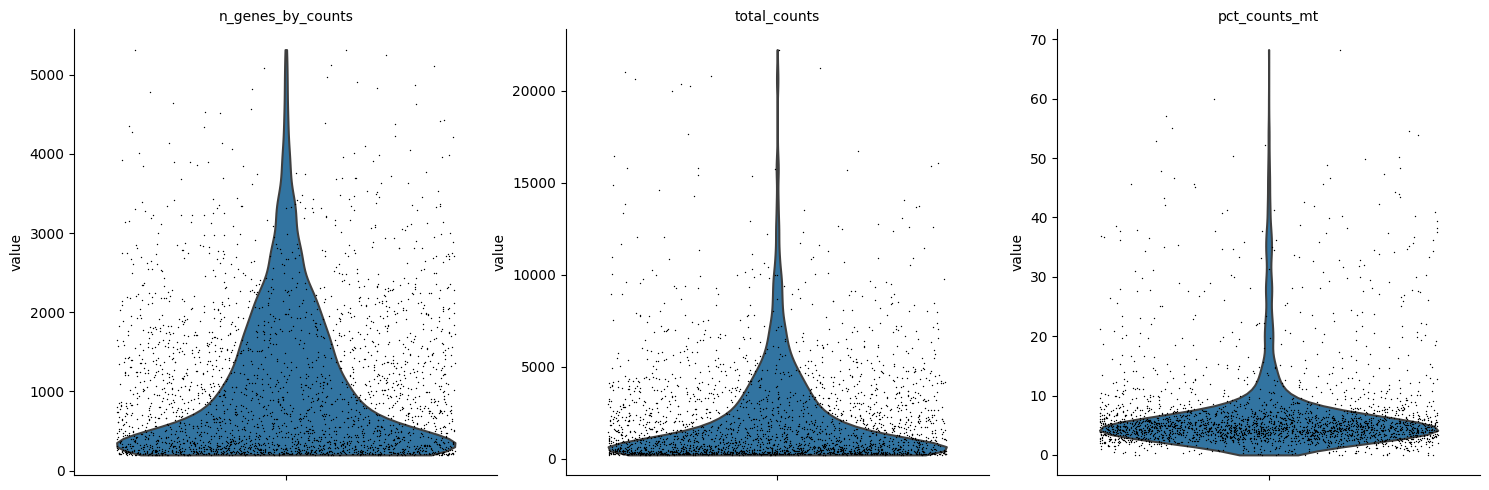

In [130]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [131]:
# filter low-quality cell 
adata = adata[adata.obs.n_genes_by_counts < 3000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :].copy() 

In [132]:
adata_view = adata.copy() 
sc.pp.normalize_total(adata_view, target_sum=TOTAL_SUM)
sc.pp.log1p(adata_view, base=BASE)
sc.pp.highly_variable_genes(adata_view, n_top_genes=2000)
sc.pp.pca(adata_view)
sc.pp.neighbors(adata_view)
sc.tl.umap(adata_view)

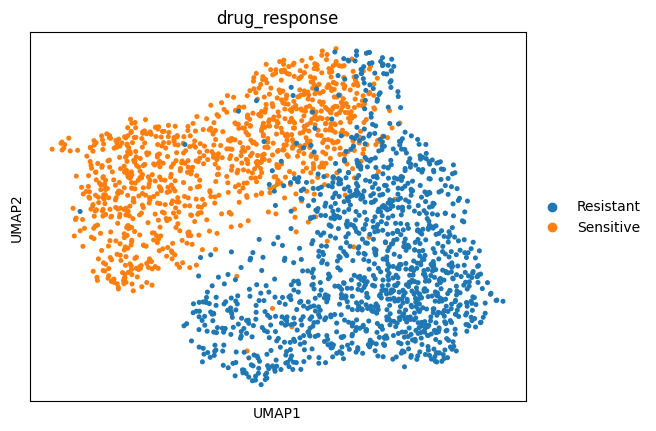

In [133]:
sc.pl.umap(adata_view, color=[RESPONSE_LABEL])

In [134]:
adata.obs[REFERENCE] = (
    "Aissa A F, Islam A B, Ariss M M, et al. Single-cell transcriptional changes associated with drug "
    "tolerance and response to combination therapies in cancer[J]. Nature communications, 2021, 12(1): 1628."
)
adata.obs[SPECIES] = "human"
adata.obs[TISSUE] = "lung"
adata.obs[SEQUENCING_METHOD] = "Drop-seq"
adata.obs[DRUG] = "Erlotinib"
adata.obs = get_target_obs(adata.obs)
adata.obs

,drug_response,reference,species,tissue,sequencing_method,drug
sens_TTACTAAGTAAC,Sensitive,"Aissa A F, Islam A B, Ariss M M, et al. Single...",human,lung,Drop-seq,Erlotinib
sens_GGCTAACACGAG,Sensitive,"Aissa A F, Islam A B, Ariss M M, et al. Single...",human,lung,Drop-seq,Erlotinib
sens_GTACAACTCACG,Sensitive,"Aissa A F, Islam A B, Ariss M M, et al. Single...",human,lung,Drop-seq,Erlotinib
sens_GGTTATCATCCT,Sensitive,"Aissa A F, Islam A B, Ariss M M, et al. Single...",human,lung,Drop-seq,Erlotinib
sens_GCATGATCTCAT,Sensitive,"Aissa A F, Islam A B, Ariss M M, et al. Single...",human,lung,Drop-seq,Erlotinib
...,...,...,...,...,...,...
resis_GGTTCATAACTT,Resistant,"Aissa A F, Islam A B, Ariss M M, et al. Single...",human,lung,Drop-seq,Erlotinib
resis_GTCCCGACTGCA,Resistant,"Aissa A F, Islam A B, Ariss M M, et al. Single...",human,lung,Drop-seq,Erlotinib
resis_GCCACGGACGAG,Resistant,"Aissa A F, Islam A B, Ariss M M, et al. Single...",human,lung,Drop-seq,Erlotinib
resis_GGCTCACCGAAT,Resistant,"Aissa A F, Islam A B, Ariss M M, et al. Single...",human,lung,Drop-seq,Erlotinib


In [135]:
adata.var 

,features,species,n_cells,mt,ribo,hb,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
A2ML1,A2ML1,human,42,False,False,False,42,0.016850,98.461538,46
A4GALT,A4GALT,human,37,False,False,False,37,0.013919,98.644689,38
AAAS,AAAS,human,84,False,False,False,84,0.032601,96.923077,89
AACS,AACS,human,188,False,False,False,188,0.079121,93.113553,216
AADAC,AADAC,human,12,False,False,False,12,0.004396,99.560440,12
...,...,...,...,...,...,...,...,...,...,...
ZFP37,ZFP37,human,9,False,False,False,9,0.003663,99.670330,10
ZNF18,ZNF18,human,10,False,False,False,10,0.003663,99.633700,10
ZNF674,ZNF674,human,8,False,False,False,8,0.002930,99.706960,8
ZNF69,ZNF69,human,9,False,False,False,9,0.003297,99.670330,9


In [136]:
adata.write_h5ad(os.path.join(data_dir, COUNT_DATA_FILE_NAME))